### Distribución Normal con Python

La distribución normal es una de las distribuciones más importantes, y probablemente sea el modelo de distribución más usado y conocido, lo usamos para describir variables reales continuas. También llamado Distribución Gaussiana en honor al matemático alemán Carl Friedrich Gauss.

Se ajusta a la distribución de probabilidad de muchos eventos, ej. Puntuaciones de coeficiente intelectual, latidos, etc.

Usando varias funciones de numpy para calcular matemáticamente los valores de una distribución normal. Se crean histogramas sobre los cuales trazamos la curva de distribución de probabilidad.

**Ejemplo:**
- Las alturas de las personas se distribuyen normalmente de manera famosa. Si solo se analizan pocos datos, obtendremos una distribución de aspecto extraño. Pero a medida que se aumente la cantidad de amigos muestreados (por ejemplo, todos sus amigos de Facebook, asumiendo que es razonablemente social), la distribución comenzará a parecerse cada vez más a una distribución normal.

- La duración de un determinado componente electrónico, en horas, es una variable aleatória continua que se distribuye según una media y varianza específica. ¿Cuál es la **probabilidad** de que la duración de una de esas componentes sea superior a un determinado número de horas? ¿y de que esté entre un intervalo fijo de horas?

#### 01. Importamos modulos necesarios

In [ ]:
import numpy as np # cálculos matriciales
import scipy.stats as ss # análisis estadístico
from scipy.stats import norm # análisis estadístico
from scipy import stats # análisis estadistico
import statsmodels.api as sm # análisis estadístico
import matplotlib.pyplot as plt # análisis gráfico
import seaborn as sns # análisis gráfico

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### 02. Generamos una variable aletoria con distribución normal

In [ ]:
# Generamos una variable aletoria con distribución normal con media 0 y varianza 1
x_normal = np.random.normal(loc=10, # media 
                            scale=30, # varianza
                            size=1000) # muestra

In [ ]:
# Mostramos nuestros parámetros
print('Parámetros distribución normal:','\n')
print('Promedio: ', np.mean(x_normal))
print('Varianza:', np.std(x_normal))
print('Muestra:',len(x_normal))

Parámetros distribución normal: 

Promedio:  10.94897891285069
Varianza: 29.14746497082193
Muestra: 1000


In [ ]:
# Mostramos nuestras variables generadas
print('Detalle de variables:','\n')
print(x_normal)

Detalle de variables: 

[ 3.61657861e+00 -5.13018123e+00 -2.51411995e+00 -1.57686760e+01
  3.15326078e+01  1.49449555e+01  2.84602719e+01  1.03180430e+01
  3.37843825e+01 -2.83129557e+01 -2.11461622e+01 -1.42385191e+00
  1.49749799e+01  3.44057591e+01  4.20164795e+01  3.46904471e+01
 -6.55905579e+01  1.36730381e+01 -3.49362400e+01  4.39279984e+00
  6.26439093e+01  1.57842680e+01  7.21090484e-02 -1.11525353e+01
 -1.64499726e+01  2.38814441e+01  1.97426327e+01  3.04937541e+01
 -3.44478352e+01  3.13176938e+01 -7.86099503e+00 -1.38778055e+01
  5.24290764e+01  2.43705438e+01  3.94083223e+01  4.22483985e+01
 -3.43924565e+00 -2.57017013e+01 -6.51651477e+00  1.09119359e+01
  1.03041394e+01  4.54038863e+01 -6.69368176e+01  4.61092606e+01
 -4.36353033e+01 -1.29006062e+01  6.60390093e+00 -5.17189823e+00
  3.14822930e+01  1.61802826e+01  4.66763530e+01  1.99937091e+01
  2.89836446e+01  2.24922324e+01 -1.23261374e+01 -1.54053885e+01
  5.18465020e+01  2.60114184e+01  1.68431521e+01 -2.66979317e+01
 

#### 03. Graficamos la distribución normal

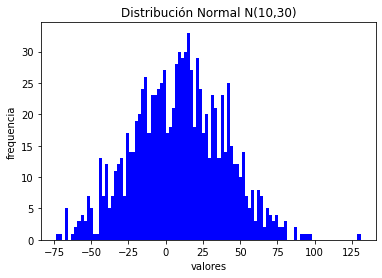

In [ ]:
# Gráfica de distribución normal
#plt.figure(figsize=(16,5), dpi=30)
plt.title('Distribución Normal N(10,30)')
plt.hist(x_normal, bins= 100, color='b')
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.show()

#### 04. Graficamos la distribución normal acumulada

Recuerden que la función de distribución acumulada de una variable aleatoria x es la probabilidad de que dicha variable tome un valor menor o igual que x. En el caso de la función de distribución Normal es siempre estrictamente creciente, continua y tiene forma de **S**.

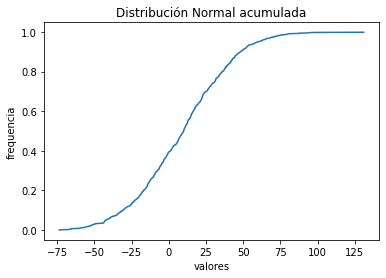

In [ ]:
X2 = np.sort(x_normal)
F2 = np.array(range(1000))/float(1000)

plt.title('Distribución Normal acumulada')
plt.plot(X2, F2)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.show()

#### 05. ¿Son verdaderamente normales nuestros datos

- Ahora crearemos una distribución de probabilidad continua en base a nuestras variables de la muestra y las sobre pondremos en nuestro gráfico de variables aleatorias normales generadas para realizar un análisis comparativo gráfico inicial

In [ ]:
# Se distribuye normalmente mi muestra?
dist = norm(loc=np.mean(x_normal), # creación de distribución normal en base a muestra original
            scale=np.std(x_normal))

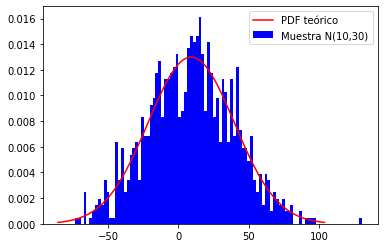

In [ ]:
margen = np.linspace(dist.ppf(0.001),
                dist.ppf(0.999), 100)
plt.hist(x_normal, density =True,bins= 100, color='b', label="Muestra N(10,30)")
plt.plot(margen, dist.pdf(margen), color='r', label="PDF teórico")
plt.legend()

Finalmente validamos la normalidad de nuestra variable aleatoria con el test de Shapiro-Wilk:

Las pruebas de Shapiro-Wilk  constrastan si una muestra aleatoria proviene de una distribución normal. La hipótesis es la siguiente:
- La hipótesis nula de la prueba es que los datos se distribuyen normalmente. Si el valor p devuelto es menor que 05, entonces se rechaza la hipótesis nula y hay evidencia de que los datos no provienen de una población distribuida normalmente.

In [ ]:
k2, p = stats.normaltest(x_normal)
print(k2, p)

0.9711424700645332 0.6153455893910107


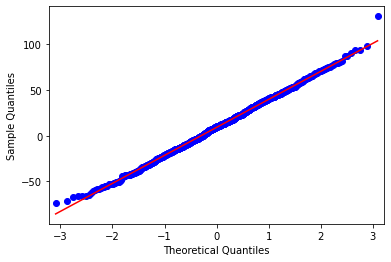

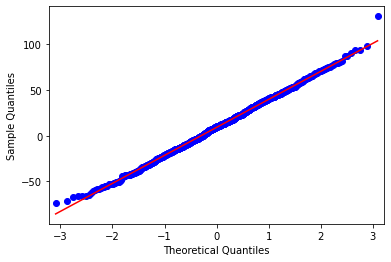

In [ ]:
# Test de normalidad
sm.qqplot(x_normal, line='s')

*Los resultados del test de Shapiro-Wilk muestran un p_value = 0.35 > 0.05, por lo que se acepta la hipótesis nula y se puede afirmar que existe suficiente evidencia para garantizar normalidad en los datos.*